# Oscilador forzado

$\dfrac{d^2x}{dt^2}+2\gamma\dfrac{dx}{dt}+\omega_0^2 x=\dfrac{F_0}{m}\cos(\omega_f t)$

donde


> $\omega_0^2=\dfrac{k}{m}$; $k$ es una constante del sistema

> $\omega_f$ es la frecuencia angular de la fuerza oscilante de amplitud F


> $2\gamma=\dfrac{\lambda}{m}$; $\lambda$  es una constante proporcional a la fuerza de rozamiento

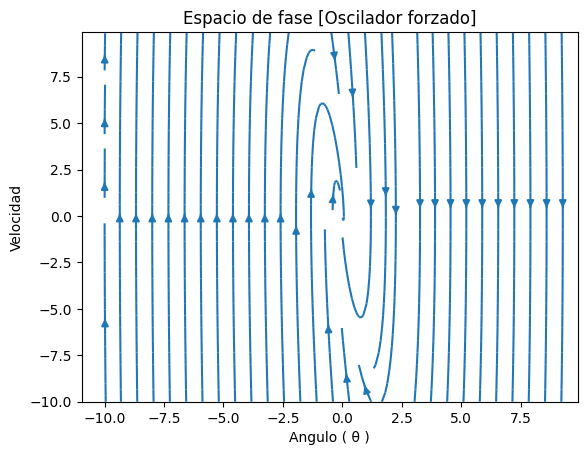

In [ ]:
from pylab import *
import numpy as np


'''
Pendulo doble

\dfrac{d^2x}{dt^2}+2\gamma\dfrac{dx}{dt}+\omega_0^2 x= \dfrac{F_0}{m}\cos(\omega_f t)

'''

#paramentros del sistema
l = 1 # $\lambda$
k = 1 # $k$
m = 1 # mass
omegaf = 100 # frecuencia angular de la fuerza oscilante de amplitud F

omega2 = 100 # frecuencia natural o propia del oscilador
gamma = 7 # constante de amortiguamiento

F0 = 1 # fuerza osciladora inicial
t = 1 # time

#valores iniciales
equis_val , vel_val = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))

#ecuaciones del sistema
equis_dot = vel_val
vel_dot = -2*gamma*equis_dot-omega2*equis_val+np.cos(omegaf*t)


streamplot(equis_val, vel_val, equis_dot, vel_dot)
ylabel("Velocidad")
xlabel("Angulo ( θ )")
title('Espacio de fase [Oscilador forzado]')

show()


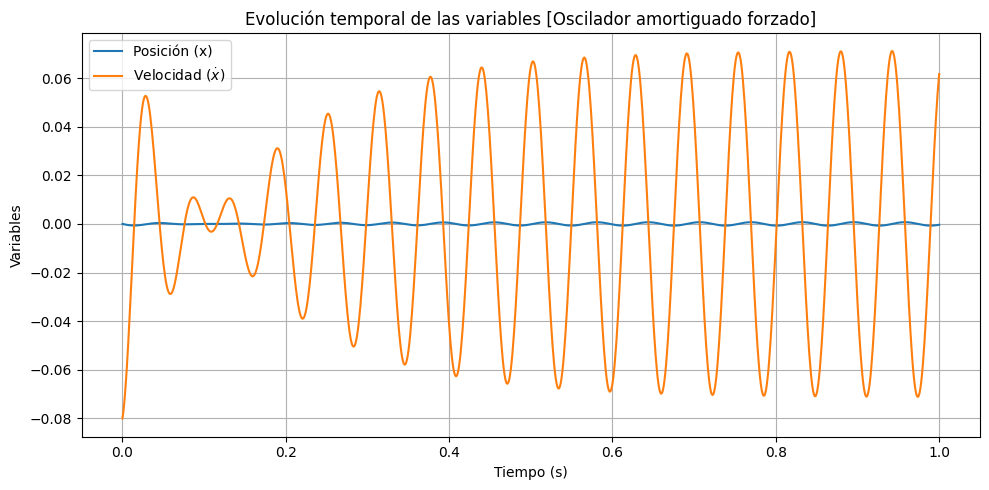

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del oscilador amortiguado forzado
gamma = 7       # Coeficiente de amortiguamiento
omega0 = 100       # Frecuencia angular natural
F0 = 1.0           # Amplitud de la fuerza externa
m = 1.0            # Masa del oscilador
omega_f = 100     # Frecuencia de la fuerza externa

# Definición de la ecuación diferencial del oscilador amortiguado forzado
def oscilador_amortiguado_forzado(t, y):
    # y[0] es la posición x, y[1] es la velocidad dx/dt
    x, x_dot = y
    dydt = [x_dot, -2 * gamma * x_dot - omega0**2 * x + (F0 / m) * np.cos(omega_f * t)]
    return dydt

# Condiciones iniciales
x0 = 0         # Posición inicial
x_dot0 = -0.08     # Velocidad inicial

# Intervalo de tiempo para la integración
t_span = (0.0, 20.0)  # Desde t=0 hasta t=20 segundos

# Resuelve la ecuación diferencial usando solve_ivp
sol = solve_ivp(oscilador_amortiguado_forzado, t_span, [x0, x_dot0], t_eval=np.linspace(0, 1, 1000))

# Extrae los resultados de la solución
t = sol.t
x = sol.y[0]
x_dot = sol.y[1]

# Grafica la posición en función del tiempo
plt.figure(figsize=(10, 5))
# plt.subplot(2, 1, 1)
plt.plot(t, x, label='Posición (x)')
plt.plot(t, x_dot, label='Velocidad ($\\dot{x}$)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Variables')
plt.title('Evolución temporal de las variables [Oscilador amortiguado forzado]')
plt.legend()
plt.grid()

# Grafica la velocidad en función del tiempo
# plt.subplot(2, 1, 2)
# plt.plot(t, x_dot, label='Velocidad (dx/dt)')
# plt.xlabel('Tiempo (s)')
# plt.ylabel('Velocidad')
# plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()
